<a href="https://colab.research.google.com/github/catcarroll98/skills-assessment-2/blob/main/skillspresentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#mount drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import relevant libraries

import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import IPython.display as IPD

In [ ]:
#Reading the CSV files of Author, Articles and Paper counts

article_df = pd.read_csv('/content/drive/MyDrive/group8/Group 8/articles.HLA-A.csv')
author_df = pd.read_csv('/content/drive/MyDrive/group8/Group 8/authors.HLA-A.csv')
paper_counts_df = pd.read_csv('/content/drive/MyDrive/group8/Group 8/paper_counts.csv')

In [ ]:
#removing data prior to 2000 as incomplete and therefor should be ommitted

article_df = article_df[~(article_df['Year'] < 2000)]

In [ ]:
IPD.display(article_df)

,PMID,Title,Abstract,ISSN,Journal,Location,Year,FirstAuthorForename,FirstAuthorLastname,FirstAuthorInitials,FirstAuthorAffiliation,FullName_1
8,10564583,Detection of a putative HLA-A*31012 processed ...,HLA class I and beta-2-microglobulin (beta2m) ...,1045-2257,"Genes, chromosomes & cancer",(27) 26-34,2000,M,Feenstra,M,"Department of Pathology, University Hospital, ...",M Feenstra
19,10605047,Expansion of tumor-T cell pairs from fine need...,Lymphocytes expanded from excised specimens ca...,0022-1767,"Journal of immunology (Baltimore, Md. : 1950)",(164) 495-504,2000,M C,Panelli,MC,"Surgery Branch, Division of Clinical Sciences,...",MC Panelli
20,10607714,HLA class I-restricted lysis of leukemia cells...,The Wilms tumor (WT1) gene has been reported t...,0006-4971,Blood,(95) 286-93,2000,H,Ohminami,H,"First Department of Internal Medicine, Ehime U...",H Ohminami
21,10608763,High frequency of cytomegalovirus-specific cyt...,How the cellular immune response copes with di...,0022-1899,The Journal of infectious diseases,(181) 165-75,2000,X,Jin,X,"Aaron Diamond AIDS Research Center, The Rockef...",X Jin
22,10623826,Human cytomegalovirus gene products US3 and US...,The epidemiological correlation between human ...,0022-1767,"Journal of immunology (Baltimore, Md. : 1950)",(164) 805-11,2000,Y,Jun,Y,"Graduate School of Biotechnology, Korea Univer...",Y Jun
...,...,...,...,...,...,...,...,...,...,...,...,...
5141,38041496,Identification of the novel HLA-A*03:453 allel...,HLA-A*03:453 differs from HLA-A*03:02:01:01 by...,2059-2310,HLA,10.1111/tan.15311,2023,Yanmin,He,Y,"HLA Typing Laboratory, Blood Center of Zhejian...",Y He
5142,38044808,Characterization of the novel HLA-A*02:01:01:2...,HLA-A*02:01:01:243 differs from the HLA-A*02:0...,2059-2310,HLA,10.1111/tan.15312,2023,Diamanto,Kouniaki,D,"Immunology and Histocompatibility Department, ...",D Kouniaki
5143,38048969,"Diversity of HLA-A, -B, -C, -DRB1, and -DQB1 a...",Kazakhstan is a transcontinental former Soviet...,1879-0038,Gene,(896) 148062,2023,Abdelhafidh,Hajjej,A,"Department of Immunogenetics, National Blood T...",A Hajjej
5144,38065105,SARS-CoV-2 immune response and reinfection in ...,"Immune response to pathogens, including corona...",1606-7916,Salud publica de Mexico,(66) 14-16,2023,Victor,Monteón,V,"Centro Investigaciones Biomédicas, Universidad...",V Monteón


In [ ]:
#Adding the FullName column for the missing values count and for the further analysing purpose because this dataframe has so many similar Lastnames.

article_df['FullName_1'] = article_df['FirstAuthorForename'].astype(str) + ' ' + article_df['FirstAuthorLastname'].astype(str) + ' ' + article_df['FirstAuthorInitials'].astype(str)

# Displaying the Dataframe with the FullName column
IPD.display(article_df)

,PMID,Title,Abstract,ISSN,Journal,Location,Year,FirstAuthorForename,FirstAuthorLastname,FirstAuthorInitials,FirstAuthorAffiliation,FullName_1
8,10564583,Detection of a putative HLA-A*31012 processed ...,HLA class I and beta-2-microglobulin (beta2m) ...,1045-2257,"Genes, chromosomes & cancer",(27) 26-34,2000,M,Feenstra,M,"Department of Pathology, University Hospital, ...",M Feenstra M
19,10605047,Expansion of tumor-T cell pairs from fine need...,Lymphocytes expanded from excised specimens ca...,0022-1767,"Journal of immunology (Baltimore, Md. : 1950)",(164) 495-504,2000,M C,Panelli,MC,"Surgery Branch, Division of Clinical Sciences,...",M C Panelli MC
20,10607714,HLA class I-restricted lysis of leukemia cells...,The Wilms tumor (WT1) gene has been reported t...,0006-4971,Blood,(95) 286-93,2000,H,Ohminami,H,"First Department of Internal Medicine, Ehime U...",H Ohminami H
21,10608763,High frequency of cytomegalovirus-specific cyt...,How the cellular immune response copes with di...,0022-1899,The Journal of infectious diseases,(181) 165-75,2000,X,Jin,X,"Aaron Diamond AIDS Research Center, The Rockef...",X Jin X
22,10623826,Human cytomegalovirus gene products US3 and US...,The epidemiological correlation between human ...,0022-1767,"Journal of immunology (Baltimore, Md. : 1950)",(164) 805-11,2000,Y,Jun,Y,"Graduate School of Biotechnology, Korea Univer...",Y Jun Y
...,...,...,...,...,...,...,...,...,...,...,...,...
5141,38041496,Identification of the novel HLA-A*03:453 allel...,HLA-A*03:453 differs from HLA-A*03:02:01:01 by...,2059-2310,HLA,10.1111/tan.15311,2023,Yanmin,He,Y,"HLA Typing Laboratory, Blood Center of Zhejian...",Yanmin He Y
5142,38044808,Characterization of the novel HLA-A*02:01:01:2...,HLA-A*02:01:01:243 differs from the HLA-A*02:0...,2059-2310,HLA,10.1111/tan.15312,2023,Diamanto,Kouniaki,D,"Immunology and Histocompatibility Department, ...",Diamanto Kouniaki D
5143,38048969,"Diversity of HLA-A, -B, -C, -DRB1, and -DQB1 a...",Kazakhstan is a transcontinental former Soviet...,1879-0038,Gene,(896) 148062,2023,Abdelhafidh,Hajjej,A,"Department of Immunogenetics, National Blood T...",Abdelhafidh Hajjej A
5144,38065105,SARS-CoV-2 immune response and reinfection in ...,"Immune response to pathogens, including corona...",1606-7916,Salud publica de Mexico,(66) 14-16,2023,Victor,Monteón,V,"Centro Investigaciones Biomédicas, Universidad...",Victor Monteón V


Finding the missing count of values in articles dataframe

In [ ]:
articles_missing_count = article_df.isnull().sum()
IPD.display(articles_missing_count)

PMID                       0
Title                      0
Abstract                   0
ISSN                       0
Journal                    0
Location                  21
Year                       0
FirstAuthorForename        4
FirstAuthorLastname        3
FirstAuthorInitials       11
FirstAuthorAffiliation    39
FullName_1                 0
dtype: int64

Removing the missing values rows based on the important data(PMID,FirstAuthorForename,FirstAuthorLastname,FirstAuthorInitials)



In [ ]:
# Dropping rows where 'PMID', 'Year', 'FirstAuthorForename', or 'FirstAuthorLastname' are missing in the articles dataframe
articles_df = article_df.dropna(subset=['PMID', 'Year', 'FirstAuthorForename', 'FirstAuthorLastname','FirstAuthorInitials'])
missing_values_cleaned_articles = articles_df.isnull().sum()
IPD.display(missing_values_cleaned_articles)

PMID                       0
Title                      0
Abstract                   0
ISSN                       0
Journal                    0
Location                  20
Year                       0
FirstAuthorForename        0
FirstAuthorLastname        0
FirstAuthorInitials        0
FirstAuthorAffiliation    36
FullName_1                 0
dtype: int64

Displaying the Article dataframe after removing the missing value rows

In [ ]:
IPD.display(articles_df)

,PMID,Title,Abstract,ISSN,Journal,Location,Year,FirstAuthorForename,FirstAuthorLastname,FirstAuthorInitials,FirstAuthorAffiliation,FullName_1
8,10564583,Detection of a putative HLA-A*31012 processed ...,HLA class I and beta-2-microglobulin (beta2m) ...,1045-2257,"Genes, chromosomes & cancer",(27) 26-34,2000,M,Feenstra,M,"Department of Pathology, University Hospital, ...",M Feenstra M
19,10605047,Expansion of tumor-T cell pairs from fine need...,Lymphocytes expanded from excised specimens ca...,0022-1767,"Journal of immunology (Baltimore, Md. : 1950)",(164) 495-504,2000,M C,Panelli,MC,"Surgery Branch, Division of Clinical Sciences,...",M C Panelli MC
20,10607714,HLA class I-restricted lysis of leukemia cells...,The Wilms tumor (WT1) gene has been reported t...,0006-4971,Blood,(95) 286-93,2000,H,Ohminami,H,"First Department of Internal Medicine, Ehime U...",H Ohminami H
21,10608763,High frequency of cytomegalovirus-specific cyt...,How the cellular immune response copes with di...,0022-1899,The Journal of infectious diseases,(181) 165-75,2000,X,Jin,X,"Aaron Diamond AIDS Research Center, The Rockef...",X Jin X
22,10623826,Human cytomegalovirus gene products US3 and US...,The epidemiological correlation between human ...,0022-1767,"Journal of immunology (Baltimore, Md. : 1950)",(164) 805-11,2000,Y,Jun,Y,"Graduate School of Biotechnology, Korea Univer...",Y Jun Y
...,...,...,...,...,...,...,...,...,...,...,...,...
5141,38041496,Identification of the novel HLA-A*03:453 allel...,HLA-A*03:453 differs from HLA-A*03:02:01:01 by...,2059-2310,HLA,10.1111/tan.15311,2023,Yanmin,He,Y,"HLA Typing Laboratory, Blood Center of Zhejian...",Yanmin He Y
5142,38044808,Characterization of the novel HLA-A*02:01:01:2...,HLA-A*02:01:01:243 differs from the HLA-A*02:0...,2059-2310,HLA,10.1111/tan.15312,2023,Diamanto,Kouniaki,D,"Immunology and Histocompatibility Department, ...",Diamanto Kouniaki D
5143,38048969,"Diversity of HLA-A, -B, -C, -DRB1, and -DQB1 a...",Kazakhstan is a transcontinental former Soviet...,1879-0038,Gene,(896) 148062,2023,Abdelhafidh,Hajjej,A,"Department of Immunogenetics, National Blood T...",Abdelhafidh Hajjej A
5144,38065105,SARS-CoV-2 immune response and reinfection in ...,"Immune response to pathogens, including corona...",1606-7916,Salud publica de Mexico,(66) 14-16,2023,Victor,Monteón,V,"Centro Investigaciones Biomédicas, Universidad...",Victor Monteón V


Printing the published papers count for every years

In [ ]:
# Counting the number of papers published each year
papers_published_per_year = articles_df['Year'].value_counts().sort_index(axis=0).reset_index()
papers_published_per_year = pd.DataFrame(papers_published_per_year)


# Displaying the count of papers published each year
papers_published_per_year

,index,Year
0,2000,174
1,2001,188
2,2002,181
3,2003,178
4,2004,180
5,2005,198
6,2006,176
7,2007,230
8,2008,182
9,2009,183


Displaying the author dataframe

In [ ]:

IPD.display(author_df)

,PMID,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation
0,10551415,1,N,Yamada,N,"Division of Viral Immunology, Center for AIDS ..."
1,10551415,2,Y,Ishikawa,Y,NaN
2,10551415,3,T,Dumrese,T,NaN
3,10551415,4,K,Tokunaga,K,NaN
4,10551415,5,T,Juji,T,NaN
...,...,...,...,...,...,...
43159,38065105,3,Josefina G,Ancona-León,JG,"Facultad de Ciencias Químico Biológicas, Unive..."
43160,38065105,4,Gicel,Gutiérrez-Torres,G,Hospital General de Especialidades Dr. Javier ...
43161,38073008,1,Jongmin,Kim,J,"Department of Laboratory Medicine, Pusan Natio..."
43162,38073008,2,Kyung-Hwa,Shin,KH,"Department of Laboratory Medicine, Pusan Natio..."


Finding the missing values count of author dataframe

In [ ]:
authors_missing_count = author_df.isnull().sum()
IPD.display(authors_missing_count)

PMID                     0
AuthorN                  0
AuthorForename           5
AuthorLastname           0
AuthorInitials          37
AuthorAffiliation    21077
dtype: int64

In [ ]:
#filling the affiliation columns
author_df["AuthorAffiliation"] = author_df["AuthorAffiliation"].fillna(method='ffill')

In [ ]:
#again checking the null values
authors_missing_count = author_df.isnull().sum()
IPD.display(authors_missing_count)

PMID                  0
AuthorN               0
AuthorForename        5
AuthorLastname        0
AuthorInitials       37
AuthorAffiliation     0
dtype: int64

In [ ]:
# Extract the initial from the 'Forename' column
author_df['AuthorInitials'] =author_df['AuthorForename'].apply(lambda x: x[0] if pd.notnull(x) else '')

In [ ]:
#again checking the null values
authors_missing_count = author_df.isnull().sum()
IPD.display(authors_missing_count)

PMID                 0
AuthorN              0
AuthorForename       5
AuthorLastname       0
AuthorInitials       0
AuthorAffiliation    0
dtype: int64

Adding the column FullName by adding Forename and Lastname of the researchers using astype(str) to find the Publication count for the analysis part.

In [ ]:
# creating copy dataframe for authors to avoid copy slice errors because it was showing error like that while running without the copy dataframe
author_df = author_df.copy()

#Creating the full name column
author_df['FullName'] = author_df['AuthorForename'].astype(str) + ' ' + author_df['AuthorLastname'].astype(str) + ' ' + author_df['AuthorInitials']

# Displaying the DataFrame with the 'FullName' column
author_df

,PMID,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation,FullName
0,10551415,1,N,Yamada,N,"Division of Viral Immunology, Center for AIDS ...",N Yamada N
1,10551415,2,Y,Ishikawa,Y,"Division of Viral Immunology, Center for AIDS ...",Y Ishikawa Y
2,10551415,3,T,Dumrese,T,"Division of Viral Immunology, Center for AIDS ...",T Dumrese T
3,10551415,4,K,Tokunaga,K,"Division of Viral Immunology, Center for AIDS ...",K Tokunaga K
4,10551415,5,T,Juji,T,"Division of Viral Immunology, Center for AIDS ...",T Juji T
...,...,...,...,...,...,...,...
43159,38065105,3,Josefina G,Ancona-León,J,"Facultad de Ciencias Químico Biológicas, Unive...",Josefina G Ancona-León J
43160,38065105,4,Gicel,Gutiérrez-Torres,G,Hospital General de Especialidades Dr. Javier ...,Gicel Gutiérrez-Torres G
43161,38073008,1,Jongmin,Kim,J,"Department of Laboratory Medicine, Pusan Natio...",Jongmin Kim J
43162,38073008,2,Kyung-Hwa,Shin,K,"Department of Laboratory Medicine, Pusan Natio...",Kyung-Hwa Shin K


Clearing the missing value rows based on the unavilability of data(PMID,AuthorForname,AuthorLastname and AuthorInitials)

In [ ]:
# Dropping rows where 'PMID', 'Year', 'AuthorForename', or 'AuthorLastname' are missing in the authors dataframe
authors_df = author_df.dropna(subset=['PMID','AuthorForename', 'AuthorLastname','AuthorInitials'])
missing_values_cleaned_authors = authors_df.isnull().sum()
IPD.display(missing_values_cleaned_authors)

PMID                 0
AuthorN              0
AuthorForename       0
AuthorLastname       0
AuthorInitials       0
AuthorAffiliation    0
FullName             0
dtype: int64

Displaying the author dataframe after clearing the missing values

In [ ]:
IPD.display(authors_df)

,PMID,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation,FullName
0,10551415,1,N,Yamada,N,"Division of Viral Immunology, Center for AIDS ...",N Yamada
1,10551415,2,Y,Ishikawa,Y,NaN,Y Ishikawa
2,10551415,3,T,Dumrese,T,NaN,T Dumrese
3,10551415,4,K,Tokunaga,K,NaN,K Tokunaga
4,10551415,5,T,Juji,T,NaN,T Juji
...,...,...,...,...,...,...,...
43159,38065105,3,Josefina G,Ancona-León,JG,"Facultad de Ciencias Químico Biológicas, Unive...",JG Ancona-León
43160,38065105,4,Gicel,Gutiérrez-Torres,G,Hospital General de Especialidades Dr. Javier ...,G Gutiérrez-Torres
43161,38073008,1,Jongmin,Kim,J,"Department of Laboratory Medicine, Pusan Natio...",J Kim
43162,38073008,2,Kyung-Hwa,Shin,KH,"Department of Laboratory Medicine, Pusan Natio...",KH Shin


Displaying the paper_counts dataframe

In [ ]:
IPD.display(paper_counts_df)

,Year,Count
0,1799,1
1,1801,1
2,1802,1
3,1805,1
4,1866,1
...,...,...
138,2020,1132241
139,2021,1277048
140,2022,1324650
141,2023,1302390


Removing the entries prior to 2000

In [ ]:
paper_counts_df = paper_counts_df[~(paper_counts_df['Year'] < 2000)]

Finding the missing value

In [ ]:
papers_missing_count = paper_counts_df.isnull().sum()
IPD.display(papers_missing_count)

Year     0
Count    0
dtype: int64

Plotting the Paper_counts dataframe with year and count

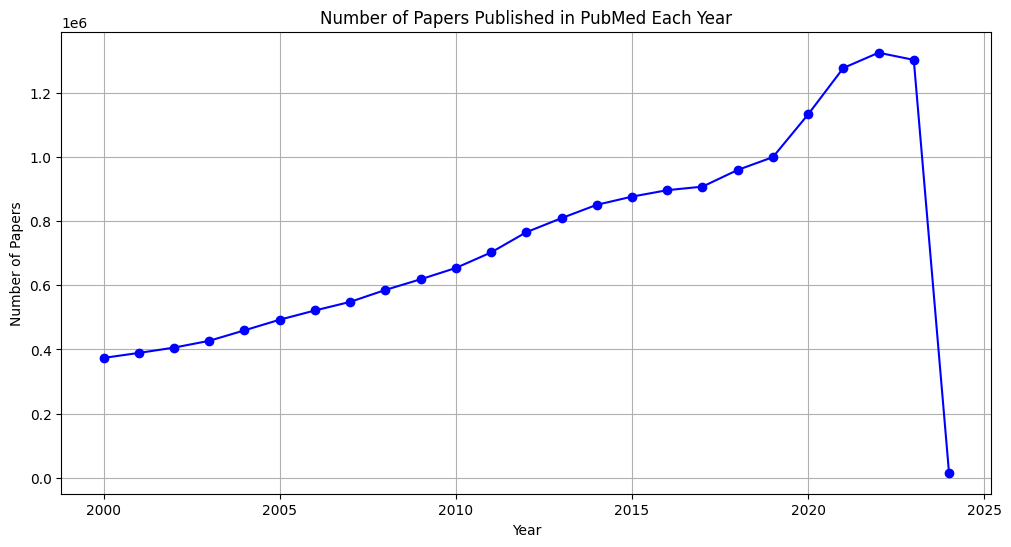

In [ ]:
import matplotlib.pyplot as plt

# Plotting a time series graph for the paper counts
plt.figure(figsize=(12, 6))
plt.plot(paper_counts_df['Year'], paper_counts_df['Count'], marker='o', linestyle='-', color='b')
plt.title('Number of Papers Published in PubMed Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Papers')
plt.grid(True)
plt.show()

Plotting the numbers of papers published in relation to HLA-A each year

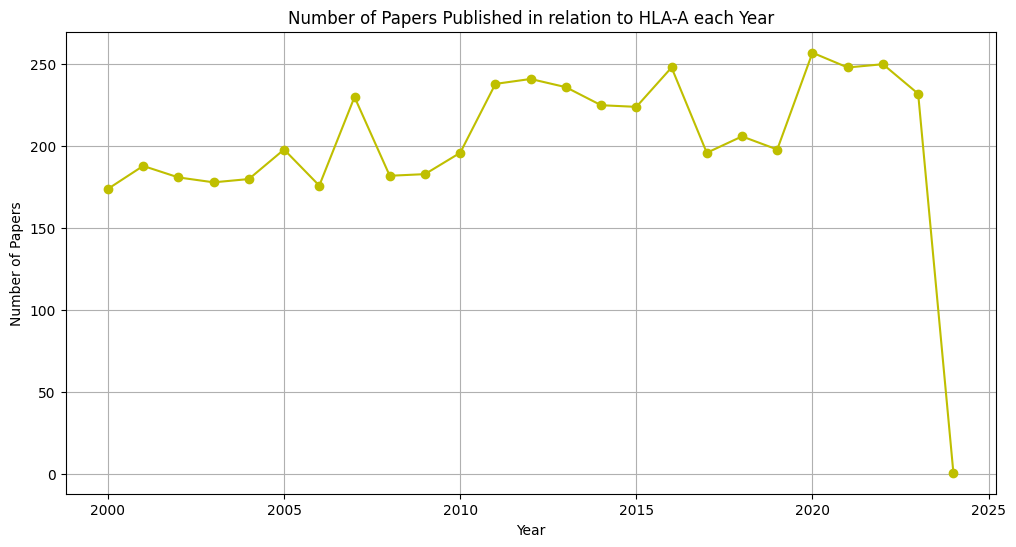

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(papers_published_per_year['index'], papers_published_per_year['Year'], marker='o', linestyle='-', color='y')
plt.title('Number of Papers Published in relation to HLA-A each Year')
plt.xlabel('Year')
plt.ylabel('Number of Papers')
plt.grid(True)
plt.show()

Finding the top authors using the Author dataframe by FullName and publication count

In [ ]:
# Counting publications for each author considering their FullName
full_name_publication_counts = authors_df.groupby(['FullName']).size().reset_index(name='PublicationCount')

# Sorting the authors based on their publication count from the year 1999-2024
Publication_counts = full_name_publication_counts.sort_values(by='PublicationCount', ascending=False)
Publication_counts

,FullName,PublicationCount
16699,PY Lin,96
11327,KL Yang,93
21452,W Zhang,60
21758,X Zhang,59
8883,J He,58
...,...,...
8846,J Goudsmit,1
8845,J Goudet,1
8843,J González-Ramos,1
8842,J González-Lahoz,1


Creating the top 20 activite researchers dataframe from 1979-2024

In [ ]:
# Displaying top authors from the year 1979-2024
top_20_active_researchers = Publication_counts.head(20)
top_20_active_researchers

,FullName,PublicationCount
16699,PY Lin,96
11327,KL Yang,93
21452,W Zhang,60
21758,X Zhang,59
8883,J He,58
22115,Y Li,54
22383,Y Zhang,50
7431,H Inoko,50
3803,CK Hurley,49
22159,Y Morishima,46


Using barplot to show the counts of publications of the top 20 researchers from 1979 to 2024

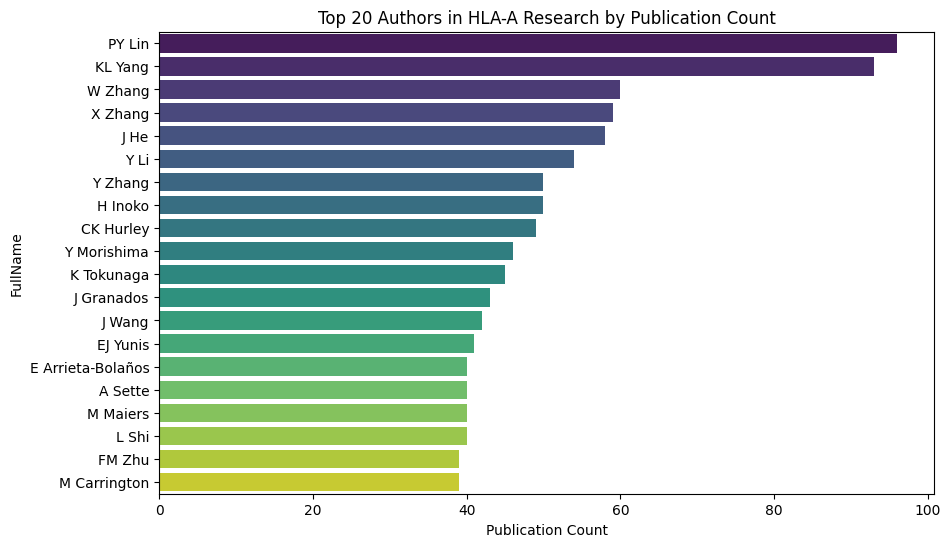

In [ ]:
#importing seaborn for the visualisation
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x='PublicationCount', y='FullName', hue='FullName', data=top_20_active_researchers, palette='viridis')
plt.title('Top 20 Authors in HLA-A Research by Publication Count')
plt.xlabel('Publication Count')
plt.show()

Creating the network based on the Full Name from top_20_active_researchers with the authors df to find the co-authors by using pmid

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
# Creating the subset of the authors dataframe focusing on the top authors
top_author_names = top_20_active_researchers['FullName'].tolist()
top_20_active_researchers = authors_df[authors_df['FullName'].isin(top_author_names)]

# Creating the co-authorship network by considering fullnames with use of pmid
G_full_name = nx.Graph()
for pmid, group in top_20_active_researchers.groupby('PMID'):
    authors = group['FullName'].tolist()
    for author in authors:
        if author not in G_full_name:
            G_full_name.add_node(author)
        for coauthor in authors:
            if author != coauthor:
                G_full_name.add_edge(author, coauthor)

# Extracting connected components (collaboration networks)
connected_components = list(nx.connected_components(G_full_name))
#printing the connected components
connected_components

[{'A Sette',
  'CK Hurley',
  'FM Zhu',
  'H Inoko',
  'J He',
  'J Wang',
  'K Tokunaga',
  'L Shi',
  'M Carrington',
  'M Maiers',
  'W Zhang',
  'X Zhang',
  'Y Li',
  'Y Morishima',
  'Y Zhang'},
 {'E Arrieta-Bolaños', 'EJ Yunis', 'J Granados'},
 {'KL Yang', 'PY Lin'}]

plotting the network diagram to understand better

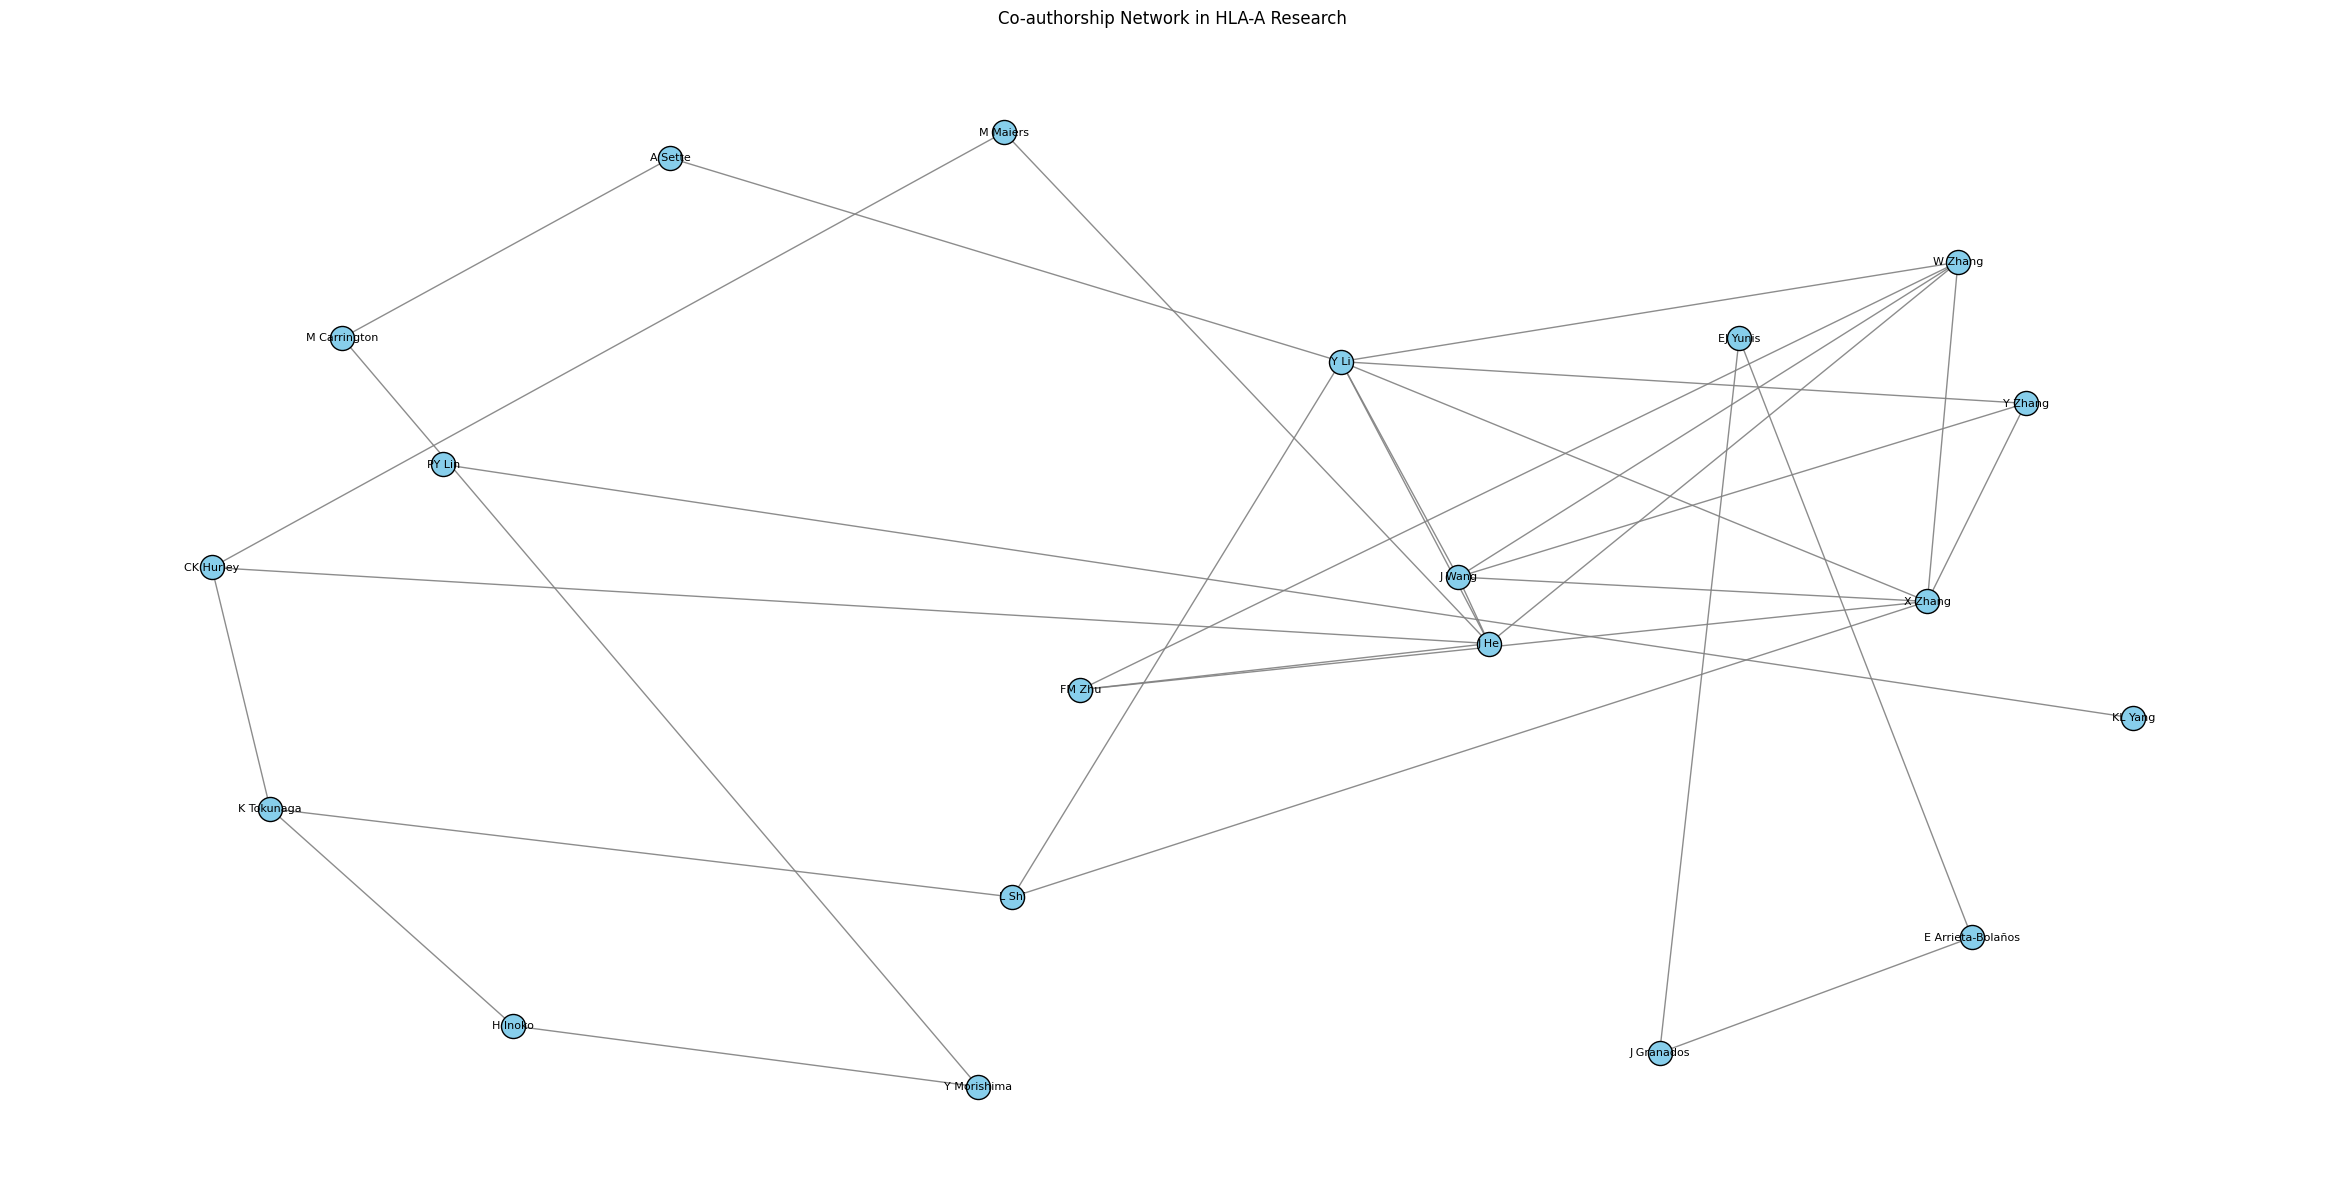

In [ ]:
# Drawing the network graph with spacing
plt.figure(figsize=(30, 15))
# Increasing the 'k' parameter to increase repulsive force between nodes
pos = nx.spring_layout(G_full_name, k=3.0, iterations=100)

# Drawing the nodes and edges
nx.draw_networkx_nodes(G_full_name, pos, node_color='skyblue', edgecolors='black')
nx.draw_networkx_edges(G_full_name, pos, edge_color='gray', alpha=0.9)

# Drawing the labels
for node, (x, y) in pos.items():
    plt.text(x, y, node, fontsize=8, ha='center', va='center')

# Giving the  title and remove axis
plt.title("Co-authorship Network in HLA-A Research")
plt.axis('off')

# Show the plot
plt.show()

In [ ]:
#merging the articles dataframe 'year' with the author dataframe by using the PMID
merged_df = authors_df.merge(articles_df[['PMID', 'Year']], on='PMID')

IPD.display(merged_df)

,PMID,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation,FullName,Year
0,10564583,1,M,Feenstra,M,"Department of Pathology, University Hospital, ...",M Feenstra,2000
1,10564583,2,J,Bakema,J,NaN,J Bakema,2000
2,10564583,3,M,Verdaasdonk,M,NaN,M Verdaasdonk,2000
3,10564583,4,E,Rozemuller,E,NaN,E Rozemuller,2000
4,10564583,5,J,van den Tweel,J,NaN,J van den Tweel,2000
...,...,...,...,...,...,...,...,...
42414,38065105,3,Josefina G,Ancona-León,JG,"Facultad de Ciencias Químico Biológicas, Unive...",JG Ancona-León,2023
42415,38065105,4,Gicel,Gutiérrez-Torres,G,Hospital General de Especialidades Dr. Javier ...,G Gutiérrez-Torres,2023
42416,38073008,1,Jongmin,Kim,J,"Department of Laboratory Medicine, Pusan Natio...",J Kim,2023
42417,38073008,2,Kyung-Hwa,Shin,KH,"Department of Laboratory Medicine, Pusan Natio...",KH Shin,2023


In [ ]:
#paper counts for each year from 1979-2024

papers_published_per_year_1 = merged_df['Year'].value_counts().sort_index()

# Display the count of papers published each year
IPD.display(papers_published_per_year_1)

2000    1165
2001    1385
2002    1292
2003    1305
2004    1444
2005    1521
2006    1419
2007    1922
2008    1362
2009    1454
2010    1707
2011    2054
2012    2010
2013    2144
2014    1925
2015    1996
2016    2179
2017    1730
2018    1788
2019    1906
2020    2612
2021    1916
2022    2207
2023    1974
2024       2
Name: Year, dtype: int64

In [ ]:
#publication trends of top 20 active researchers from 1979-2024

top_20_full_names = top_20_active_researchers['FullName']

# filtering the 'merged_df' for the top 20 researchers
top_20_publication_activity = merged_df[merged_df['FullName'].isin(top_20_full_names)]

# And we can able to filter for the recent years
recent_years_cutoff = merged_df['Year'].max() - 10
top_20_recent_publication_activity = top_20_publication_activity[top_20_publication_activity['Year'] >= recent_years_cutoff]

# Counting publications per year for each of the top 20 authors over the last 10 years
print('publications per year for each of the top 20 authors over the last 10 years')
top_20_publication_trends = top_20_recent_publication_activity.groupby(['FullName', 'Year']).size().unstack(fill_value=0)

IPD.display(top_20_publication_trends)

publications per year for each of the top 20 authors over the last 10 years


Year,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
FullName,,,,,,,,,,
A Sette,1,2,2,1,4,0,1,0,0,0
CK Hurley,1,0,1,1,1,2,2,0,0,0
E Arrieta-Bolaños,1,0,0,0,1,5,30,0,0,1
EJ Yunis,0,0,0,0,0,0,30,0,0,0
FM Zhu,3,5,7,0,1,0,0,0,0,0
H Inoko,2,5,3,0,0,2,0,0,1,0
J Granados,0,0,0,2,1,0,32,1,1,0
J He,4,5,10,1,2,3,5,5,4,2
J Wang,2,2,2,4,3,1,2,6,3,3
